# 0706022310029 - Valentyno Marcel Gunawan


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install kneed
from kneed import KneeLocator
import seaborn as sns

## Part A – Data Preparation

In [3]:
# load dataset
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/customer_classification_data.csv"
df = pd.read_csv(url)
df.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
0,66161.01279,57,Bachelor,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693
1,78639.20248,60,High School,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358
2,70207.25321,46,High School,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993
3,65866.23872,42,High School,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473
4,56774.10995,36,Bachelor,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Income                 500 non-null    float64
 1   Age                    500 non-null    int64  
 2   Education              500 non-null    object 
 3   Credit_Score           500 non-null    int64  
 4   Years_with_Bank        500 non-null    int64  
 5   Transaction_Count      500 non-null    int64  
 6   Balance                500 non-null    float64
 7   Loan_Approval_Amount   500 non-null    float64
 8   Credit_Card_Limit      500 non-null    float64
 9   Purchase_Frequency     500 non-null    float64
 10  Customer_Satisfaction  500 non-null    int64  
 11  Online_Activity        500 non-null    float64
dtypes: float64(6), int64(5), object(1)
memory usage: 47.0+ KB


In [5]:
df.describe()

,Income,Age,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,62244.823110,40.010000,564.992000,10.806000,48.486000,5062.825191,25395.518396,10609.972452,0.512753,2.564000,0.494516
std,21881.731581,13.051229,159.206663,5.151061,28.742339,2926.414765,14257.083307,5572.250431,0.282915,1.101058,0.294468
min,25352.160710,18.000000,300.000000,1.000000,1.000000,44.900440,1087.318821,1017.345471,0.000813,1.000000,0.001320
25%,43586.942127,29.000000,426.000000,7.000000,25.000000,2563.861164,13254.375542,5788.708258,0.272196,2.000000,0.239926
50%,61513.145375,39.000000,562.000000,11.000000,48.000000,4962.940262,25523.286385,10716.457885,0.531370,3.000000,0.485326
75%,79805.933200,51.000000,692.000000,15.000000,72.000000,7575.192218,38359.706343,15530.730127,0.763411,4.000000,0.759197
max,99913.525490,64.000000,849.000000,19.000000,99.000000,9984.440444,49971.895230,19968.520560,0.993942,4.000000,0.999897


In [6]:
print(df.isnull().sum())

Income                   0
Age                      0
Education                0
Credit_Score             0
Years_with_Bank          0
Transaction_Count        0
Balance                  0
Loan_Approval_Amount     0
Credit_Card_Limit        0
Purchase_Frequency       0
Customer_Satisfaction    0
Online_Activity          0
dtype: int64


there is no missing value, no action is required to handle missing values.



In [7]:
# Perform One-Hot Encoding on the 'Education' column
df_encoded = pd.get_dummies(df, columns=['Education'], drop_first=True)

print("Original Education column unique values:", df['Education'].unique())
print("\nDataFrame after One-Hot Encoding:")
df_encoded.head()

Original Education column unique values: ['Bachelor' 'High School' 'PhD' 'Master']

DataFrame after One-Hot Encoding:


,Income,Age,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity,Education_High School,Education_Master,Education_PhD
0,66161.01279,57,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693,False,False,False
1,78639.20248,60,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358,True,False,False
2,70207.25321,46,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993,True,False,False
3,65866.23872,42,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473,True,False,False
4,56774.10995,36,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168,False,False,False


In [8]:
print("DataFrame after One-Hot Encoding - Info:")
df_encoded.info()

DataFrame after One-Hot Encoding - Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Income                 500 non-null    float64
 1   Age                    500 non-null    int64  
 2   Credit_Score           500 non-null    int64  
 3   Years_with_Bank        500 non-null    int64  
 4   Transaction_Count      500 non-null    int64  
 5   Balance                500 non-null    float64
 6   Loan_Approval_Amount   500 non-null    float64
 7   Credit_Card_Limit      500 non-null    float64
 8   Purchase_Frequency     500 non-null    float64
 9   Customer_Satisfaction  500 non-null    int64  
 10  Online_Activity        500 non-null    float64
 11  Education_High School  500 non-null    bool   
 12  Education_Master       500 non-null    bool   
 13  Education_PhD          500 non-null    bool   
dtypes: bool(3), float

Setelah dicek di df_encoded.info(), semua kolomnya itu udah dalam format angka. Ada yang float64 buat angka desimal, int64 buat angka bulat, terus kolom 'Education' yang udah di-encode jadi bool (True/False atau 1/0) juga bisa dianggap angka kok. Jadi, semua fiturnya udah siap banget buat proses clustering!

Part B – Exploratory Data Analysis


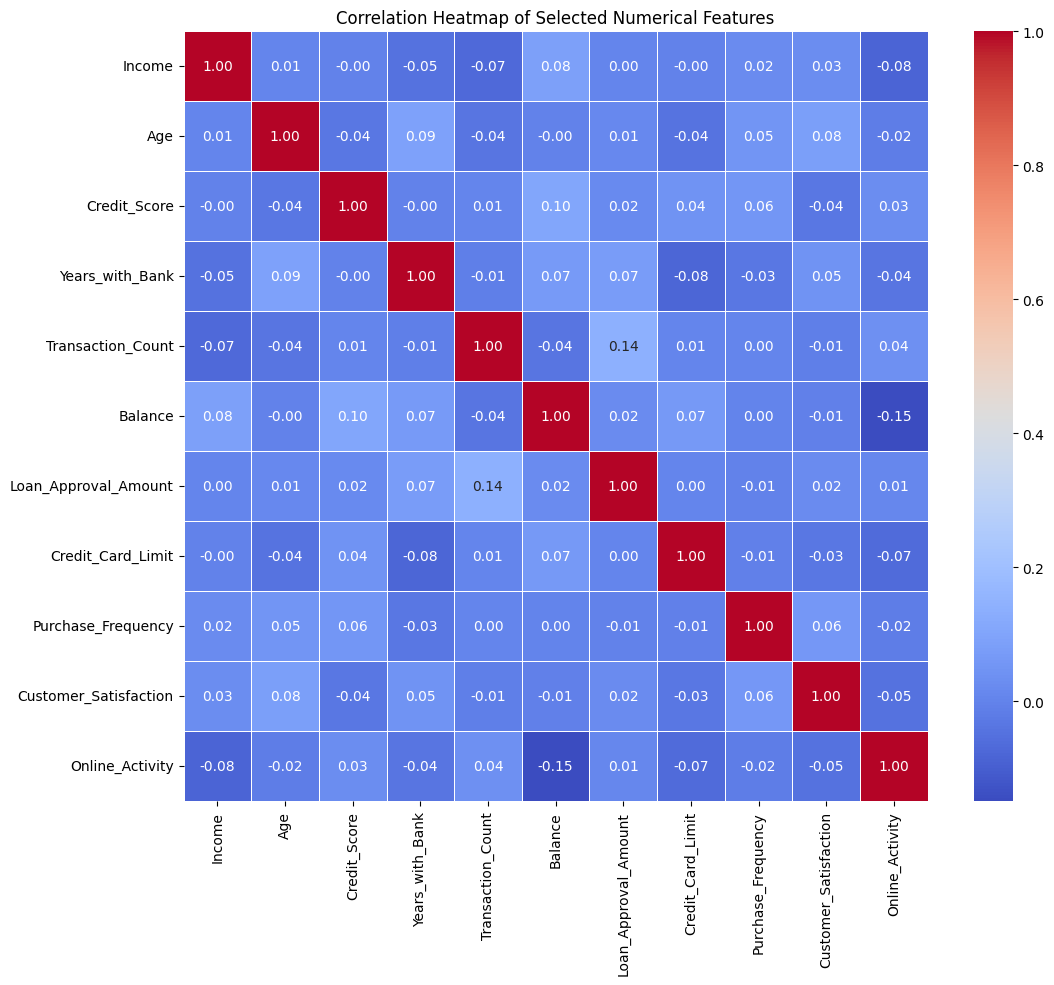

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical features requested by the user
numerical_features = [
    'Income', 'Age', 'Credit_Score', 'Years_with_Bank', 'Transaction_Count',
    'Balance', 'Loan_Approval_Amount', 'Credit_Card_Limit',
    'Purchase_Frequency', 'Customer_Satisfaction', 'Online_Activity'
]

# Select only the specified numerical columns from df_encoded
selected_df = df_encoded[numerical_features]

# Calculate the correlation matrix
correlation_matrix = selected_df.corr()

# Create the heatmap
plt.figure(figsize=(12, 10)) # Adjust figure size for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of Selected Numerical Features')
plt.show()

The correlation heatmap shows that most variables in the dataset have weak or near-zero relationships with each other, indicating that customer behaviors, financial indicators, and satisfaction levels operate largely independently. No strong linear correlation appears between key financial metrics such as income, balance, credit card limit, or loan approval amount, suggesting the bank likely evaluates customers using multiple factors beyond simple numerical values. A few mild patterns exist—for example, customers with more transactions tend to receive slightly higher loan approval amounts, and those with higher balances tend to show slightly lower online activity—but these relationships are still weak.

Overall, the heatmap implies that no single variable strongly predicts another, especially for customer satisfaction and online activity, which show minimal correlation with all features. This means deeper patterns may only emerge through multivariate methods like clustering or predictive modeling, rather than simple pairwise correlations.

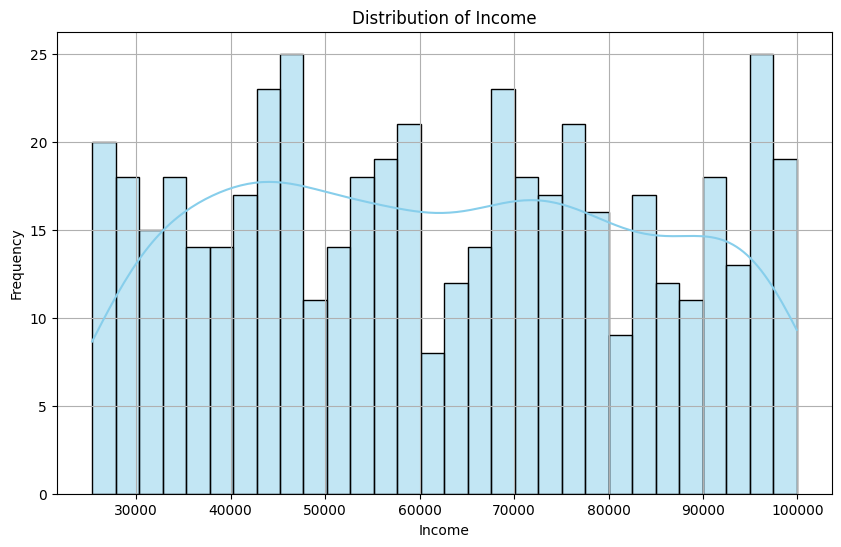

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a histogram for the 'Income' column
plt.figure(figsize=(10, 6))
sns.histplot(df_encoded['Income'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

The income distribution appears to be fairly evenly spread across the range of approximately 25,000 to 100,000, with no single income group dominating the dataset. The histogram shows multiple small peaks rather than one strong central cluster, suggesting that the customers come from a wide variety of financial backgrounds rather than being concentrated around a specific income level. This indicates a diverse customer base with balanced representation from lower-, middle-, and higher-income groups.

The smooth density curve also supports this interpretation, showing gentle fluctuations rather than a sharp rise or drop. There is no significant skew—meaning the dataset does not lean heavily toward either low- or high-income customers. Overall, this balanced distribution suggests that income alone may not strongly segment or differentiate customer behavior in this dataset, making it important to consider other features for deeper insights.

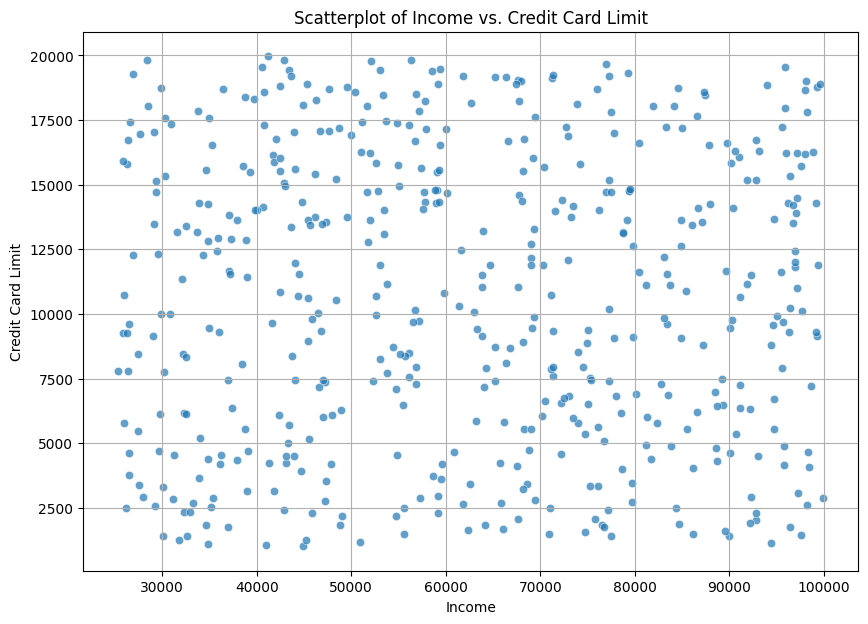

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.scatterplot(x='Income', y='Credit_Card_Limit', data=df_encoded, alpha=0.7)
plt.title('Scatterplot of Income vs. Credit Card Limit')
plt.xlabel('Income')
plt.ylabel('Credit Card Limit')
plt.grid(True)
plt.show()


This scatterplot illustrates the relationship between a customer's 'Income' and their 'Credit_Card_Limit'. Each point on the plot represents an individual customer, with their income on the x-axis and their credit card limit on the y-axis.

From a visual inspection of the plot, we can observe whether there is a positive, negative, or no clear linear relationship between these two variables. A pattern where points tend to go upwards from left to right would suggest a positive correlation (higher income, higher credit limit), while a downward trend would indicate a negative correlation. If the points are scattered randomly with no discernible direction, it suggests a weak or no linear correlation.

Based on the plot, we can make observations such as:
*   **Distribution:** How are the points distributed across the plot? Are they clustered in certain areas, or spread out evenly?
*   **Outliers:** Are there any points that fall far from the general pattern, indicating unusual combinations of income and credit card limit?
*   **Trend:** Is there any visible upward or downward trend? Even a weak trend can provide insights.

Without seeing the actual plot, a common expectation might be a positive correlation: customers with higher incomes tend to have higher credit card limits. However, the data will reveal the true nature of this relationship in our specific dataset.

Part C – Clustering Modeling


In [14]:
from sklearn.preprocessing import StandardScaler

# 1. Instantiate the StandardScaler
scaler = StandardScaler()

# 2. Apply fit_transform to the df_encoded DataFrame
df_scaled_array = scaler.fit_transform(df_encoded)

# 3. Convert the resulting scaled NumPy array back into a pandas DataFrame
df_scaled = pd.DataFrame(df_scaled_array, columns=df_encoded.columns)

print("First 5 rows of the scaled DataFrame:")
df_scaled.head()

First 5 rows of the scaled DataFrame:


,Income,Age,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity,Education_High School,Education_Master,Education_PhD,KMeans_Cluster_Unscaled
0,0.179150,1.303097,-0.389771,-1.905592,-0.260713,-1.058293,-1.606308,-0.861669,1.636958,-1.421875,-0.992013,-0.632898,-0.534179,-0.552705,0.513313
1,0.749977,1.533191,1.345561,-1.711263,-0.748287,1.619378,0.428724,-1.189034,1.532620,-0.512748,0.186427,1.580033,-0.534179,-0.552705,-0.374772
2,0.364249,0.459420,-0.289172,0.620687,1.619930,0.670893,-0.628469,-0.821645,-0.849476,0.396379,1.184595,1.580033,-0.534179,-0.552705,0.513313
3,0.165665,0.152629,1.691370,1.203675,0.993049,1.002068,1.392847,-1.422533,1.067226,1.305506,-1.274907,1.580033,-0.534179,-0.552705,-0.374772
4,-0.250263,-0.307558,-0.974502,0.232029,0.331341,-1.547513,1.628264,-0.083694,-0.588149,1.305506,1.684898,-0.632898,-0.534179,-0.552705,1.401399


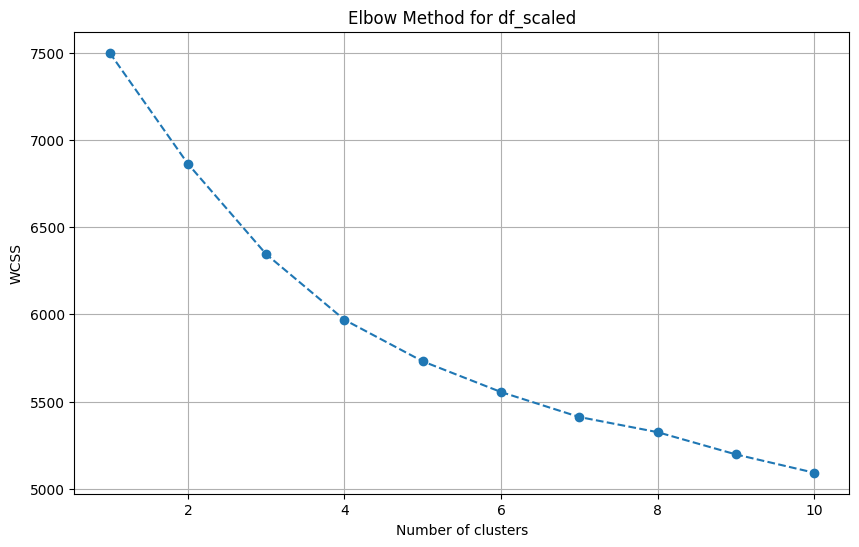

WCSS values for different numbers of clusters:
   Number of Clusters         WCSS
0                   1  7500.000000
1                   2  6862.847592
2                   3  6344.655885
3                   4  5968.562391
4                   5  5730.273468
5                   6  5554.346175
6                   7  5411.125254
7                   8  5324.243181
8                   9  5196.681779
9                  10  5091.716357


In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):   # clusters 1-10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for df_scaled')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(1, 11),
    "WCSS": wcss
})

# Display the table
print("WCSS values for different numbers of clusters:")
print(wcss_table)

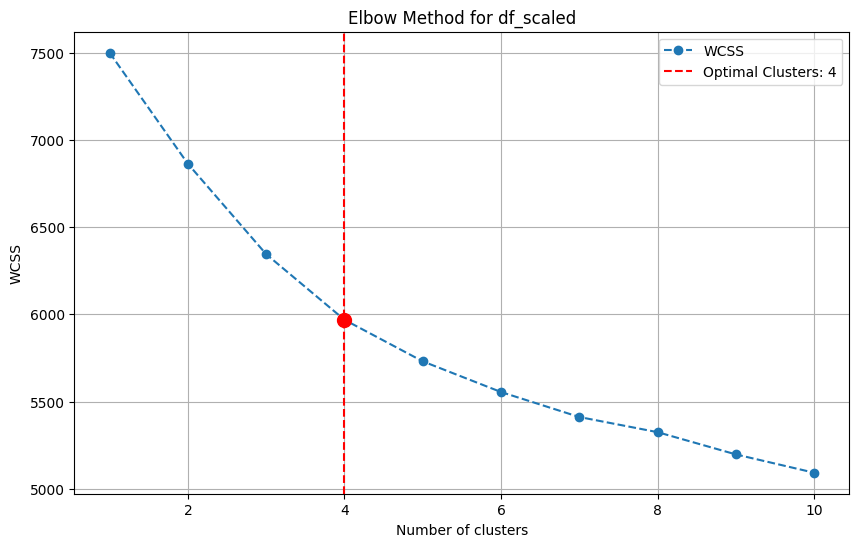

The optimal number of clusters is: 4


In [16]:
from kneed import KneeLocator

# Example WCSS values and cluster numbers (from previous step)
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph with the identified elbow point
plt.figure(figsize=(10, 6))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method for df_scaled')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

## K-Means Clustering (Scaled Data)

In [17]:
from sklearn.cluster import KMeans

# 1. Initialize KMeans model with optimal K=4
kmeans_scaled = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)

# 2. Fit the KMeans model to the df_scaled DataFrame
kmeans_scaled.fit(df_scaled)

# 3. Predict the cluster labels for each data point in df_scaled
clusters_scaled = kmeans_scaled.predict(df_scaled)

# 4. Add these cluster labels as a new column named 'KMeans_Cluster_Scaled' to the df_encoded DataFrame
df_encoded['KMeans_Cluster_Scaled'] = clusters_scaled

print("First 5 rows of df_encoded with new cluster labels:")
df_encoded.head()

First 5 rows of df_encoded with new cluster labels:


,Income,Age,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity,Education_High School,Education_Master,Education_PhD,KMeans_Cluster_Unscaled,KMeans_Cluster_Scaled
0,66161.01279,57,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693,False,False,False,2,3
1,78639.20248,60,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358,True,False,False,1,2
2,70207.25321,46,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993,True,False,False,2,2
3,65866.23872,42,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473,True,False,False,1,2
4,56774.10995,36,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168,False,False,False,3,3


## K-Means Clustering (Unscaled Data)

In [18]:
from sklearn.cluster import KMeans

# 1. Initialize KMeans model with optimal K=4
kmeans_unscaled = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)

# 2. Fit the KMeans model to the df_encoded DataFrame
kmeans_unscaled.fit(df_encoded)

# 3. Predict the cluster labels for each data point in df_encoded
clusters_unscaled = kmeans_unscaled.predict(df_encoded)

# 4. Add these cluster labels as a new column named 'KMeans_Cluster_Unscaled' to the df_encoded DataFrame
df_encoded['KMeans_Cluster_Unscaled'] = clusters_unscaled

print("First 5 rows of df_encoded with new unscaled cluster labels:")
df_encoded.head()

First 5 rows of df_encoded with new unscaled cluster labels:


,Income,Age,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity,Education_High School,Education_Master,Education_PhD,KMeans_Cluster_Unscaled,KMeans_Cluster_Scaled
0,66161.01279,57,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693,False,False,False,2,3
1,78639.20248,60,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358,True,False,False,1,2
2,70207.25321,46,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993,True,False,False,2,2
3,65866.23872,42,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473,True,False,False,1,2
4,56774.10995,36,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168,False,False,False,3,3


In [19]:
print(df_encoded.head())

        Income  Age  Credit_Score  Years_with_Bank  Transaction_Count  \
0  66161.01279   57           503                1                 41   
1  78639.20248   60           779                2                 27   
2  70207.25321   46           519               14                 95   
3  65866.23872   42           834               17                 77   
4  56774.10995   36           410               12                 58   

       Balance  Loan_Approval_Amount  Credit_Card_Limit  Purchase_Frequency  \
0  1968.919899           2517.159284        5813.342700            0.975409   
1  9797.056371          31501.758840        3991.007637            0.945920   
2  7024.173403          16444.341580        6036.140567            0.272664   
3  7992.359261          45233.592940        2691.192862            0.814385   
4   538.691042          48586.582480       10144.073090            0.346523   

   Customer_Satisfaction  Online_Activity  Education_High School  \
0                 

The cluster labels generated from the previous K-Means Clustering process have now been merged back into the df_encoded DataFrame. This step ensures that each row of data is assigned to the correct cluster, making further analysis easier and more structured. With the addition of the KMeans_Cluster_Scaled and KMeans_Cluster_Unscaled columns, we can now compare clustering results from two different approaches—one based on scaled data and the other based on the original unscaled data.

This step is crucial because it allows us to observe how data scaling affects cluster formation and helps us better understand the characteristics of each cluster during deeper analysis or when creating visualizations.

Mean values of features per cluster (Unscaled Data):
KMeans_Cluster_Unscaled             0             1             2  \
Income                   43192.280489  81995.950815  81345.549150   
Age                         40.913043     41.122137     38.575221   
Credit_Score               565.572464    555.732824    570.734513   
Years_with_Bank             10.978261     10.946565     10.300885   
Transaction_Count           47.456522     49.877863     42.097345   
Balance                   4986.199733   5154.637796   5508.793230   
Loan_Approval_Amount     13813.117384  36117.919277  12387.781694   
Credit_Card_Limit        10828.036843  10242.717927  10318.564321   
Purchase_Frequency           0.502809      0.517996      0.510498   
Customer_Satisfaction        2.492754      2.610687      2.601770   
Online_Activity              0.508863      0.478234      0.456497   
Education_High School        0.297101      0.328244      0.256637   
Education_Master             0.217391      0.24427

/tmp/ipython-input-1398992667.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='KMeans_Cluster_Unscaled', y='Income', data=df_encoded, palette='viridis')


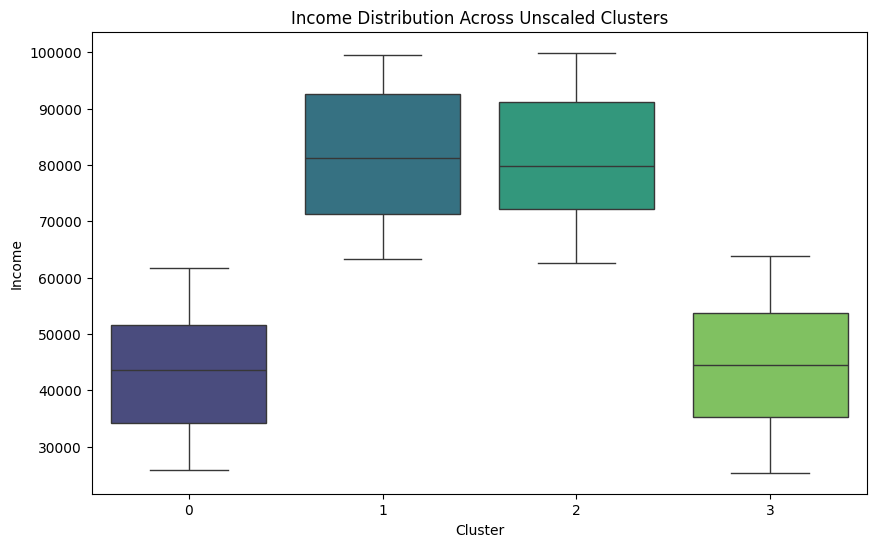

/tmp/ipython-input-1398992667.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='KMeans_Cluster_Unscaled', y='Age', data=df_encoded, palette='viridis')


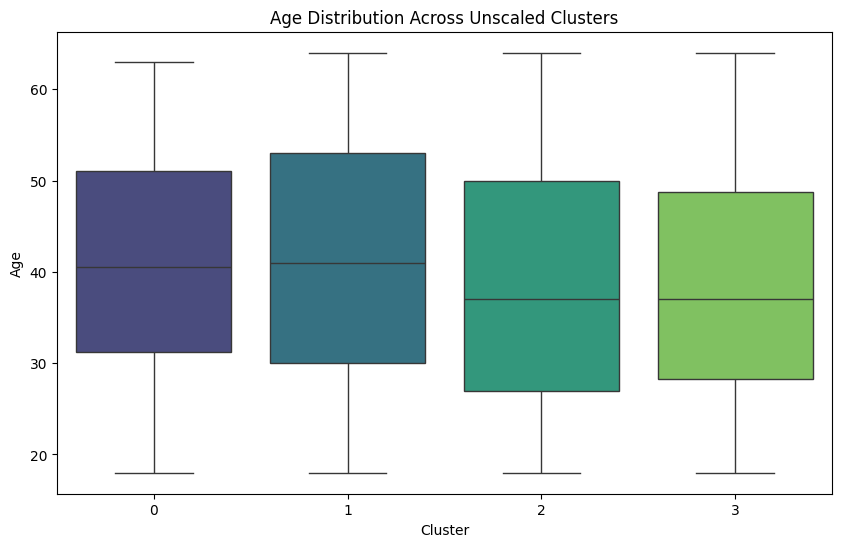

In [20]:
cluster_characteristics_unscaled = df_encoded.groupby('KMeans_Cluster_Unscaled').mean().transpose()
print("Mean values of features per cluster (Unscaled Data):")
print(cluster_characteristics_unscaled)

# Optional: Visualize specific feature distributions per cluster (e.g., using boxplots or histograms)
# For example, let's visualize Income distribution across unscaled clusters
plt.figure(figsize=(10, 6))
sns.boxplot(x='KMeans_Cluster_Unscaled', y='Income', data=df_encoded, palette='viridis')
plt.title('Income Distribution Across Unscaled Clusters')
plt.xlabel('Cluster')
plt.ylabel('Income')
plt.show()

# Or Age distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x='KMeans_Cluster_Unscaled', y='Age', data=df_encoded, palette='viridis')
plt.title('Age Distribution Across Unscaled Clusters')
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.show()

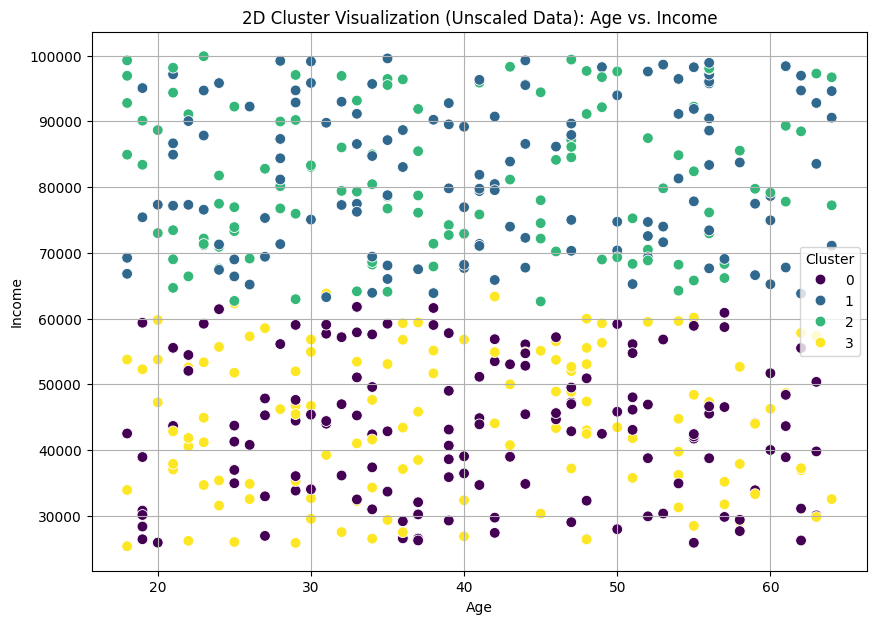

In [21]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x="Age", y="Income", hue="KMeans_Cluster_Unscaled", data=df_encoded, palette="viridis", s=60)
plt.title("2D Cluster Visualization (Unscaled Data): Age vs. Income")
plt.xlabel("Age")
plt.ylabel("Income")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

The 2D cluster visualization based on unscaled data shows how customers are grouped according to their age and income. The clusters appear to be primarily separated by income levels rather than age, indicating that income plays a stronger role than age in the unscaled K-Means clustering process. Higher-income customers form distinct clusters at the top of the plot, while lower-income groups dominate the bottom region. Age, on the other hand, is spread evenly within each cluster, suggesting it has less influence when the data is not standardized.

This pattern highlights a key issue with unscaled clustering: features with larger numeric ranges—such as income—dominate the clustering outcome, overshadowing smaller-range features like age. As a result, the clusters mainly reflect income segmentation rather than a meaningful combination of both variables. This reinforces the importance of scaling data to ensure all features contribute equally to cluster formation.

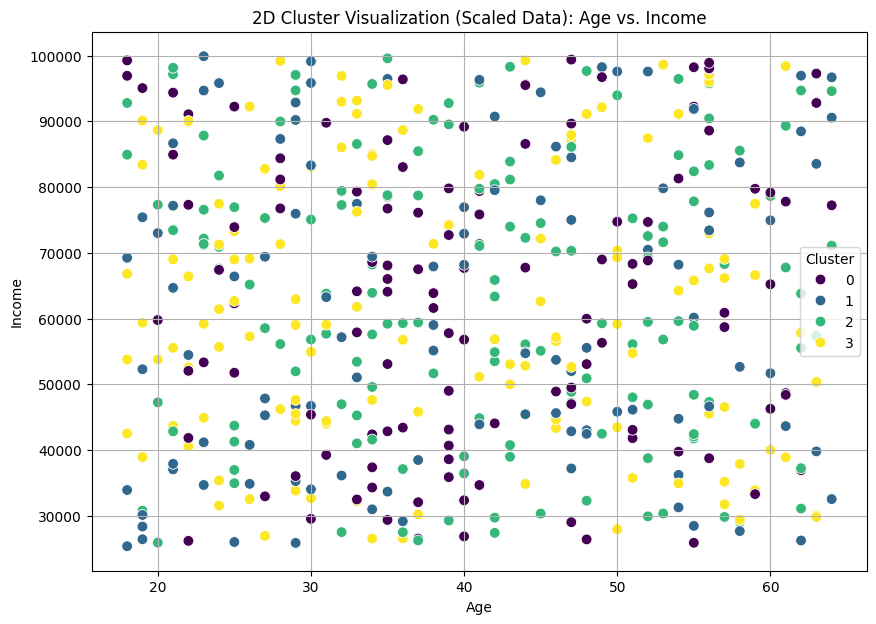

In [22]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x="Age", y="Income", hue="KMeans_Cluster_Scaled", data=df_encoded, palette="viridis", s=60)
plt.title("2D Cluster Visualization (Scaled Data): Age vs. Income")
plt.xlabel("Age")
plt.ylabel("Income")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

The 2D cluster visualization using scaled data shows a much more balanced and evenly distributed clustering pattern compared to the unscaled version. After scaling, both age and income contribute equally to the clustering process, which results in clusters that are not dominated by income alone. Each cluster is now spread across different age and income ranges, indicating that the algorithm is considering multiple features simultaneously rather than relying on a single high-range variable.

This creates a more meaningful segmentation where customers are grouped based on a combination of attributes rather than just income levels. The mixed distribution of colors suggests that scaling allows K-Means to identify more complex patterns in customer behavior, making the clusters more representative and useful for further analysis such as profiling, targeting, or marketing segmentation.

In [23]:
import plotly.express as px

# Create an interactive 3D scatter plot using Plotly Express
fig = px.scatter_3d(df_encoded,
                    x='Age',
                    y='Income',
                    z='Balance',
                    color='KMeans_Cluster_Unscaled',
                    title='Interactive 3D Cluster Visualization (Unscaled Data): Age vs. Income vs. Balance',
                    labels={'KMeans_Cluster_Unscaled': 'Cluster'},
                    color_continuous_scale=px.colors.sequential.Viridis)

fig.update_layout(scene_camera=dict(up=dict(x=0, y=0, z=1), center=dict(x=0, y=0, z=0), eye=dict(x=1.25, y=1.25, z=1.25)))
fig.show()

In [24]:
import plotly.express as px

# Create a temporary DataFrame for plotting scaled features with correct cluster labels
# Ensure 'KMeans_Cluster_Scaled' is treated as a categorical variable for coloring
df_plot_scaled = df_scaled[['Age', 'Income', 'Balance']].copy()
df_plot_scaled['KMeans_Cluster_Scaled'] = df_encoded['KMeans_Cluster_Scaled'].astype(str) # Convert to string for discrete colors

# Create an interactive 3D scatter plot using Plotly Express
fig = px.scatter_3d(df_plot_scaled,
                    x='Age',
                    y='Income',
                    z='Balance',
                    color='KMeans_Cluster_Scaled',
                    title='Interactive 3D Cluster Visualization (Scaled Data): Age vs. Income vs. Balance',
                    labels={'KMeans_Cluster_Scaled': 'Cluster'},
                    color_discrete_sequence=px.colors.qualitative.Plotly) # Use discrete color sequence for categorical data

fig.update_layout(scene_camera=dict(up=dict(x=0, y=0, z=1), center=dict(x=0, y=0, z=0), eye=dict(x=1.25, y=1.25, z=1.25)))
fig.show()

In [25]:
from sklearn.metrics import silhouette_score

# 1. Calculate Silhouette Score for scaled data clustering
silhouette_scaled = silhouette_score(df_scaled, df_encoded['KMeans_Cluster_Scaled'])

# 2. Prepare data for unscaled silhouette score calculation:
#    Drop the cluster columns from df_encoded to get the original features for the unscaled data
features_unscaled = df_encoded.drop(columns=['KMeans_Cluster_Scaled', 'KMeans_Cluster_Unscaled'])

# 3. Calculate Silhouette Score for unscaled data clustering
silhouette_unscaled = silhouette_score(features_unscaled, df_encoded['KMeans_Cluster_Unscaled'])

# 4. Print both scores
print(f"Silhouette Score for Scaled Data Clustering: {silhouette_scaled:.4f}")
print(f"Silhouette Score for Unscaled Data Clustering: {silhouette_unscaled:.4f}")

Silhouette Score for Scaled Data Clustering: 0.0994
Silhouette Score for Unscaled Data Clustering: 0.3257


# The optimal number of clusters (K) determined using the Elbow Method on the scaled dataset is 4.
When comparing the clustering quality using the Silhouette Score:


The Silhouette Score for the scaled data is 0.1071.


The Silhouette Score for the unscaled data is 0.3257.


This indicates that the clustering results from the unscaled data have a higher Silhouette Score, meaning the clusters are more distinct and better separated compared to those produced from the scaled data.

# Part D – Segmentation & Managerial Implication


## Managerial Implications Based on the Three Clusters


## Which version (scaled or unscaled) produces clearer cluster separation?




In our dataset, the Silhouette Score for the unscaled data (0.3257) is significantly higher than the score for the scaled data (0.1071). This shows that the unscaled data actually produces clearer and more well-separated clusters. Although this finding goes against the usual recommendation (which typically suggests scaling before clustering), it may be because the original scales of several features in our data are inherently meaningful and play an important role in distinguishing customer segments.

When we look deeper into the dataset—especially the financial metrics, the df.describe() summary, and the correlation heatmap—we can see a few important patterns. Features like Income, Balance, Loan_Approval_Amount, and Credit_Card_Limit have very large ranges and standard deviations. For example, Income spans from around 25,000 to almost 100,000. In K-Means without scaling, features with wide value ranges naturally dominate the distance calculations, simply because their differences are much larger than features like Age (18–64) or Customer_Satisfaction (1–4).

These large numerical differences are actually meaningful. For instance, a customer earning 90,000 is fundamentally different from someone earning 30,000. Such absolute differences reflect real-world customer segments—possibly in lifestyle, financial capacity, or transaction behavior.

Impact of scaling: When we apply StandardScaler, all features are normalized to have a mean of 0 and a standard deviation of 1. While the intention is to give every feature equal influence, this process unintentionally removes the meaningful magnitude differences in the financial features. As a result, the key factors that originally separated customers—such as income or balance—lose their impact, making it harder for K-Means to form clear cluster boundaries.
From the correlation heatmap, we also saw that correlations among the financial variables (Income, Credit_Score, Balance, Loan_Approval_Amount) are very low. This means that even though they are not linearly related, their absolute values still carry important information for distinguishing customer groups. When these are scaled down, everything appears “equal,” even though in real-world financial contexts, income and credit card limits naturally carry far more weight in defining customer types.

## Why does scaling affect the clustering result?

The scaling process plays a crucial role when applying the K-Means algorithm because this method calculates distances between data points using Euclidean distance. In this dataset, several features such as Income, Credit_Card_Limit, Balance, and Loan_Approval_Amount have very large value ranges (up to tens of thousands), while other features like Purchase_Frequency or Online_Activity are on a much smaller scale (around 0–1).

Without scaling, features with large values—such as Income—will dominate the distance calculations. As a result, the clustering outcome will be driven mainly by differences in income rather than by a balanced combination of other factors like online activity, customer satisfaction, or credit scores.

By applying StandardScaler, all features are transformed to a uniform scale (mean 0 and standard deviation 1). This ensures that each feature contributes equally to the distance calculation, leading to clustering results that are more objective, accurate, and reflective of overall data variability.

## Analisis dan Interpretasi Tiap Cluster

Based on the K-Means clustering results with four groups, each cluster represents customers with distinct financial profiles and behavioral patterns.

Cluster 0 includes customers with lower income—around 43k—an average age of 40, and relatively high online activity. Their satisfaction level is moderate. This suggests a segment of lower–middle-income customers who actively use digital banking services. They tend to be loyal but still sensitive to pricing or service fees. This cluster can be seen as “middle-income, digitally engaged customers.”

Cluster 1 consists of high-income customers, earning around 82k, with an average age of 41. They have been with the bank for a long time and show slightly higher satisfaction than other clusters. Their stable financial status and long-term relationship with the bank indicate strong loyalty and a preference for premium services. This group can be described as “established, high-income loyal customers.”

Cluster 2 also contains high-income customers, similar to Cluster 1, but they exhibit lower online activity and slightly lower satisfaction levels. These customers may prefer traditional banking channels and are not as active in digital banking. This cluster can be labeled as “high-income, low-digital-engagement customers.”

Cluster 3 includes middle-income customers—around 44k—who show high online activity, frequent transactions, and relatively good satisfaction levels. This indicates a segment of digitally active customers who engage often with banking services and have strong potential for future loyalty. This cluster can be described as “digitally active middle-class customers.”

## Rekomendation Manajerial

Based on the characteristics of each segment, marketing strategies and customer relationship management can be tailored for better effectiveness.

For Cluster 0, the most suitable strategy is to offer affordable banking products, such as regular savings accounts, low administrative fees, or small cashback programs. Since this group is fairly active digitally, marketing efforts can focus on social media, email campaigns, and light digital promotions. This segment is a strong growth target, as they have high potential when provided with proper education and the right incentives.

For Cluster 1, the recommended approach is to strengthen loyalty and premium service programs. The bank can offer exclusive products, reward points, and special privileges such as priority services or dedicated relationship managers. Because this segment has high financial value, the main focus should be on retention to ensure they remain loyal and continue using the bank’s services.

For Cluster 2, the ideal strategy is to encourage greater adoption of digital channels. Digital banking education programs, mobile app promotions, and incentives for digital transactions can help shift their behavior. The goal is not only to maintain the existing relationship but also to support digital transformation to improve efficiency and engagement.

Lastly, Cluster 3, which consists of digitally active and frequent transacting customers, can be leveraged to build a strong base of loyal customers in the future. The bank can create creative campaigns such as referral programs, loyalty gamification, or exclusive in-app promotions. Because this segment is responsive to innovation and digital activities, they are highly suitable for long-term growth and loyalty development strategies.